# ‰∏Ä„ÄÅÁéØÂ¢ÉÂáÜÂ§á

pip install requirements.txt

In [11]:
import requests
import json
import pandas as pd
from datetime import datetime
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÔºå'SimHei'ÊòØÂÆã‰ΩìÂ≠ó‰ΩìÁöÑ‰∏ÄÁßçÔºåÊ†πÊçÆÈúÄË¶ÅÈÄâÊã©ÂêàÈÄÇÁöÑÂ≠ó‰Ωì
plt.rcParams['font.sans-serif'] = 'Arial Unicode MS'

# Áî®‰∫éÊ≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑
plt.rcParams['axes.unicode_minus'] = False

# ‰∫å„ÄÅÁà¨Ëô´Ëé∑ÂèñÁ†¥Â±ÄÊòüÁêÉÁ≤æÂçéÊñáÁ´†

In [7]:
from urllib.parse import quote
import time
import random
from fake_useragent import UserAgent
import requests


def get_data(url):
    ua = UserAgent()
    user_agent = ua.random
    headers_group = {
        "accept": "application/json, text/plain, */*",
        "accept-encoding": "gzip, deflate, br",
        "accept-language": "zh-CN,zh;q=0.9",
        "cache-control": "no-cache",
        "cookie": "UM_distinctid=188126c9de5337-07a7abb9fd0331-1b525635-13c680-188126c9de61027; _ga=GA1.1.1002968551.1693924669; _ga_GDWQY4XZV0=GS1.1.1696917573.19.0.1696917573.0.0.0; zsxq_access_token=1549B62D-EC34-C9D1-18C4-9F0122DA1AD2_D1C6A4222B5F9CAF; sensorsdata2015jssdkcross=%7B%22distinct_id%22%3A%22225444245111%22%2C%22first_id%22%3A%2218824493cfa898-0c30cc82c2f499-1b525635-1296000-18824493cfb153a%22%2C%22props%22%3A%7B%22%24latest_traffic_source_type%22%3A%22%E5%BC%95%E8%8D%90%E6%B5%81%E9%87%8F%22%2C%22%24latest_search_keyword%22%3A%22%E6%9C%AA%E5%8F%96%E5%88%B0%E5%80%BC%22%2C%22%24latest_referrer%22%3A%22https%3A%2F%2Fxiaobot.net%2F%22%7D%2C%22%24device_id%22%3A%2218824493cfa898-0c30cc82c2f499-1b525635-1296000-18824493cfb153a%22%2C%22identities%22%3A%22eyIkaWRlbnRpdHlfy29va2llX2lkIjoiMTg4Mjk5NDAwMWE1MzJkOTktMWE3Zi05MTFmMmFhNjM3Y2FkLTIyNTQ0NDI0NTE1MTEtMTExIn0=%22%2C%22history_login_id%22%3A%7B%22name%22%3A%22%24identity_login_id%22%2C%22value%22%3A%22225444245111%22%7D%7D; abtest_env=product; zsxqsessionid=6fa9c7672e24dc2fada79e453adc229b; __cuid=00bdeb1fab624f0bbe899542d7d07fda; amp_fef1e8=169da19e-4836-4e96-9ee7-94eeabc53f18R...1he0d9b46.1he0d9b49.2.2.4",
        "dnt": "1",
        "origin": "https://wx.zsxq.com",
        "pragma": "no-cache",
        "referer": "https://wx.zsxq.com/",
        "sec-ch-ua": '"Chromium";v="104", " Not A;Brand";v="99", "Google Chrome";v="104"',
        "sec-ch-ua-mobile": "?0",
        "sec-ch-ua-platform": "macOS",
        "sec-fetch-dest": "empty",
        "sec-fetch-mode": "cors",
        "sec-fetch-site": "same-site",
        "user-agent":  user_agent,
        "x-request-id": "820c80e29-2bf0-4d33-fb8d-3dc621004ad",
        "x-signature": "53998a061597cf1c91e06bd3a2f6fa7935ad2d73",
        "x-timestamp": "1698673871",
        "x-version": "2.45.0",
    }
    max_retries = 5
    for _ in range(max_retries):
        rsp = requests.get(url, headers=headers_group)
        print(url, rsp.status_code, user_agent)
        topics = rsp.json().get('resp_data').get('topics')
        if rsp.status_code == 200 and topics is not None:
            return topics
        print(123456)
        time.sleep(5)  # ‰æãÂ¶ÇÔºåÁ≠âÂæÖ5Áßí

 
    return []

# Á†¥Â±ÄÊòüÁêÉÁ≤æÂçé url
url = "https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20"
next_page = get_data(url)
topics = next_page
while next_page:
    create_time = next_page[-1].get('create_time')
    end_time = create_time[:20]+str(int(create_time[20:23])-1).zfill(3)+create_time[23:]
    # Êó∂Èó¥Âá∫Áé∞Êï¥ÁÇπÊó∂ÈúÄË¶ÅÁâπÊÆäÂ§ÑÁêÜÔºåÂê¶Âàô‰ºöÂá∫Áé∞ -1
    if create_time[20:23] == '000':
        temp_time = datetime.datetime.strptime(create_time, "%Y-%m-%dT%H:%M:%S.%f+0800")
        temp_time += datetime.timedelta(seconds=-1)
        end_time = temp_time.strftime("%Y-%m-%dT%H:%M:%S") + '.999+0800'
    end_time = quote(end_time)
    next_url = url + '&end_time=' + end_time
    time.sleep(random.uniform(10, 20))
    next_page = get_data(next_url)
    if next_page:
        topics = topics + next_page
        print("next_page", len(next_page), len(topics), next_url)
    else:
        print(11111, next_url, next_page)

print(len(topics))

https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20 200 Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36 Edg/117.0.2045.36
https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20&end_time=2023-10-22T09%3A03%3A02.903%2B0800 200 Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36 Edg/117.0.2045.36
next_page 20 40 https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20&end_time=2023-10-22T09%3A03%3A02.903%2B0800
https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20&end_time=2023-10-06T23%3A35%3A28.057%2B0800 200 Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36 Edg/116.0.1938.76
next_page 20 60 https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20&end_time=2023-10-06T23%3A35%3A28.057%2B0800
https://ap

In [13]:
# Serializing json
print(len(topics))
json_object = json.dumps(topics, indent=4, ensure_ascii=False)
# Writing to sample.json
with open("topics.json", "w") as outfile:
    outfile.write(json_object)

327


In [14]:
tmpArr = []
for item in topics:
    if 'talk' not in item:
        print("No talk", item)
        continue
    
    if 'article' not in item['talk']:        
        title = item["talk"]["text"]
        html_content = item["talk"]["text"]
        acticle_url = ""
    else:
        title = item["talk"]["article"]["title"]
        html_content = requests.get(item["talk"]["article"]["inline_article_url"]).content
        acticle_url = item["talk"]["article"]["inline_article_url"]
    soup = BeautifulSoup(html_content, 'html.parser')
    all_text = soup.find(class_='content ql-editor')
    tmpArr.append(
        {
            "title": title,
            "owner": item["talk"]["owner"]["name"],
            "location": item["talk"]["owner"]["location"],
            "create_time": item["create_time"],
            "readers_count": item["readers_count"],
            "likes_count": item["likes_count"],
            "article_url": acticle_url,
            "article_content": all_text,
            "hour": datetime.strptime(item["create_time"], "%Y-%m-%dT%H:%M:%S.%f%z").hour
        }
    )
df = pd.DataFrame(tmpArr)
df.to_csv("topics.csv")
df.head()

No talk {'topic_id': 588114542582444, 'group': {'group_id': 15552545485212, 'name': 'AIÁ†¥Â±Ä‰ø±‰πêÈÉ®', 'type': 'pay', 'background_url': 'https://images.zsxq.com/FslG2Iw17zo1nk4F_XhCrWvxbcR7?e=1704038399&token=kIxbL07-8jAj8w1n4s9zv64FuZZNEATmlU_Vm6zD:tsqPd2LDgT-ZwGcDtvh4t4SVTmk='}, 'type': 'q&a', 'question': {'owner': {'user_id': 88285254518482, 'name': 'È£ûÊú∫Fitz', 'avatar_url': 'https://images.zsxq.com/FkMvntdSHxxZNuoGUAmpfXJX5TK8?e=1704038399&token=kIxbL07-8jAj8w1n4s9zv64FuZZNEATmlU_Vm6zD:Hi1cKOPVQshFN_uPzv6a0ylpPPM=', 'location': '‰∏äÊµ∑'}, 'questionee': {'user_id': 51544811224184, 'name': 'findyi', 'avatar_url': 'https://images.zsxq.com/FjoYYKf24IAnA-qdduT3wHfrs9KX?e=1704038399&token=kIxbL07-8jAj8w1n4s9zv64FuZZNEATmlU_Vm6zD:bk0m5aITgrVp250Z0TI5A5d7XtY=', 'description': 'Ââç360ÊäÄÊúØÊÄªÁõë„ÄÅÊãÖ‰ªªËøáÁã¨ËßíÂÖΩÂÖ¨Âè∏CTO„ÄÅËÖæËÆØTVP', 'location': 'Âåó‰∫¨'}, 'text': 'Ê¥ãÂì•Â•ΩÂëÄÔΩû\nÊàëÊúÄËøë‰∏ÄÁõ¥Âú®ÊÄùËÄÉ‰∏Ä‰∏™ÈóÆÈ¢ò‚ÄúaiÊó∂‰ª£Ôºå‰∏Ä‰∏™‰∫∫ÁöÑÊ†∏ÂøÉÁ´û‰∫âÂäõÂà∞Â∫ï‰ºöÊòØ‰ªÄ‰πàÔºü‚Ä

title    owner location  \
0                                   ‰∏∫Âï•ÊàëÊâìÁÆóÔºåÈáçÊñ∞ÂÅö‰∏ÄÂÆ∂‰∏Ä‰∫∫‰ºÅ‰∏öÔºü       ÊΩòËææ       Âåó‰∫¨   
1  Á≠îÂ∫îÊàëÔºå‰∏ÄÂÆöË¶ÅÁúãÂÆåËøôÁØá AI ÊèêÁ§∫ËØçÈù¢ËØïÊåáÂçóÂÜçÂéªÈù¢ËØï[ÂèØÊÄú]\n\nÂ§ßÂÆ∂Â•ΩÔºåÊàëÂè´ Lisa ...  ÈòøÊüØÔΩûlisa       Âπø‰∏ú   
2                    Áü•‰πéÂ∞èÁôΩÈòÖËØªÈáè 20WÔºãÔºåË¢´‰∏≠ÁßëÈô¢ÂçöÂ£´‰ªòË¥πÂí®ËØ¢ÔºåÊàëÂÅöÂØπ‰∫Ü‰ªÄ‰πàÔºü       Áßã‰ªÅ       Â±±‰∏ú   
3  ÂàÜ‰∫´‰∏Ä‰∏™È£éÂêëÊ†á\n\nÊí≠ÊîæÈáèÁõ¥Êé•Ëøá‰∫øÔºå‰∏ªÈ°µËÆøÈóÆÈáè‰πüËøëÁôæ‰∏á\n\nÁî®AnimatediffÂÅöA...      Âê¥‰∏úÂ≠ê       Á¶èÂª∫   
4                 2‰∏™ÂçäÊúàÔºåÂèòÁé∞35W+Ôºå„ÄäAIÂÜô‰ΩúÂèòÁé∞ËØæ„ÄãÂÆûÊìçÂ§çÁõòÔºà‰∏áÂ≠óÁ≤æÂçéÔºåÊÖéÂÖ•Ôºâ       Ë¥∫Áøî       ÂõõÂ∑ù   

                    create_time  readers_count  likes_count  \
0  2023-11-05T20:05:42.848+0800           1718          112   
1  2023-11-04T22:54:54.440+0800           1932           95   
2  2023-11-03T21:55:07.364+0800           2151           67   
3  2023-11-02T20:02:38.142+0800           1800          105   
4  2023-11-02T16:58:36.722+0800           2812          135   

                                         article_url article_content  hour  
0  https://articles.zsxq.com/inline_form/id_z9p06...            None    20  
1                                                               None    22  
2  https://articles.zsxq.com/inline_form/id_m4qhb...            None    21  
3                                                               None    20  
4  https://articles.zsxq.com/inline_form/id_ws5o5...            None    16

Êä±Á¥ßÂ§ßËÖø

In [22]:

# ÁªüËÆ°ÊØè‰Ωç‰ΩúËÄÖÁöÑÊñáÁ´†Êï∞
author_article_counts = df['owner'].value_counts().reset_index()
author_article_counts.columns = ['author', 'article_count']
author_article_counts.head(10)

# # ÁªòÂà∂Êü±Áä∂Âõæ
# plt.figure(figsize=(10, 6))
# plt.bar(author_article_counts['author'], author_article_counts['article_count'])
# plt.xlabel('‰ΩúËÄÖ')
# plt.ylabel('Á≤æÂçéÊñáÁ´†Êï∞')
# plt.title('‰ΩúËÄÖÁöÑÁ≤æÂçéÊñáÁ´†Êï∞')
# plt.xticks(rotation=45)  # ÊóãËΩ¨ X ËΩ¥Ê†áÁ≠æÔºå‰ΩøÂÖ∂Êõ¥ÊòìËØª
# plt.show()

author  article_count
0  findyi             51
1      Â∞èÊΩò             21
2     Âê¥‰∏úÂ≠ê             14
3     Èó´Â∞èÊûó              9
4      ÁöÆÁâπ              9
5     Â∞è‰∏ÉÂßê              8
6      ÂÖÉÂ≥∞              7
7      È±ºÁöÆ              7
8     ÊÆµËÄÅÊπø              6
9      ÊΩòËææ              5

Â§ßËÖøÊù•Ëá™Âì™Èáå

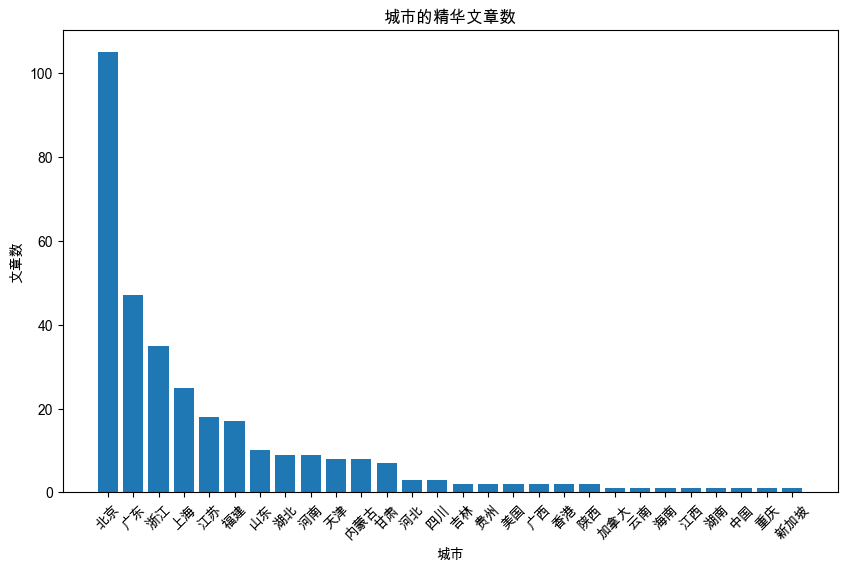

In [23]:
# Ë¶ÜÁõñ‰∫ÜÂ§öÂ∞ë‰∏™ÂüéÂ∏Ç
# ÁªüËÆ°ÊØè‰Ωç‰ΩúËÄÖÁöÑÊñáÁ´†Êï∞
metrics = df['location'].value_counts().reset_index()
metrics.columns = ['X', 'Y']

# ÁªòÂà∂Êü±Áä∂Âõæ
plt.figure(figsize=(10, 6))
plt.bar(metrics['X'], metrics['Y'])
plt.xlabel('ÂüéÂ∏Ç')
plt.ylabel('ÊñáÁ´†Êï∞')
plt.title('ÂüéÂ∏ÇÁöÑÁ≤æÂçéÊñáÁ´†Êï∞')
plt.xticks(rotation=45)  # ÊóãËΩ¨ X ËΩ¥Ê†áÁ≠æÔºå‰ΩøÂÖ∂Êõ¥ÊòìËØª
plt.show()

In [24]:

# ÁªüËÆ°ÊØè‰Ωç‰ΩúËÄÖÁöÑÊñáÁ´†Êï∞
metrics = df['hour'].value_counts().reset_index()
metrics.columns = ['X', 'Y']

# ÁªòÂà∂Êü±Áä∂Âõæ
plt.figure(figsize=(10, 6))
plt.bar(metrics['X'], metrics['Y'])
plt.xlabel('Â∞èÊó∂')
plt.ylabel('ÊñáÁ´†Êï∞')
plt.title('Â∞èÊó∂ÁöÑÁ≤æÂçéÊñáÁ´†Êï∞')
plt.xticks(rotation=45)  # ÊóãËΩ¨ X ËΩ¥Ê†áÁ≠æÔºå‰ΩøÂÖ∂Êõ¥ÊòìËØª
plt.show()

ÈòÖËØªÊï∞ÊúÄÂ§öÁöÑ10‰∏™Ê†áÈ¢ò

In [25]:
df_sorted = df.sort_values(by="readers_count", ascending=False)
top_10 = df_sorted.head(10)
top_10[['title', 'owner', 'readers_count', 'article_url']]

title       owner  \
242                   0‰ª£Á†ÅÂü∫Á°ÄÂ∞èÁôΩ‰ΩøÁî®ChatGPTÂÅöÂá∫‰∏ÄÊ¨æË∞∑Ê≠åÂÖ®Â±èÊà™ÂõæÊèí‰ª∂ÁöÑÂÖ®ËøáÁ®ã          ÈòøÂº∫   
243  ÊúÄËøëËßÅ‰∫Ü‰∏çÂ∞ëÂ§ß‰Ω¨ÂíåÂàõ‰∏öËÄÖÔºåÂØπAIËÉΩÊîπÂèòÁöÑË°å‰∏öÂíåËÉΩÂÅöÁöÑÊñπÂêëÊúâ‰∫Ü‰∏Ä‰∫õÊñ∞ÁöÑËÆ§Áü•ÔºåÂΩìÁÑ∂Êàë‰∏ç‰ºöË∞àÂ§ßÊ®°Âûã...      findyi   
239                                  Â¶Ç‰ΩïÂà©Áî® ChatGPT ËæÖÂä©ÂÜô‰Ωú         Èó´Â∞èÊûó   
241  ÂàöÊâç‰∏Ä‰∏™Êù•Ëá™Êó•ËØ≠Â∞èËØ≠ÁßçÊñáÁßëÁîüÁöÑÊèêÈóÆÔºåÈóÆÈ¢òÊòØÊñáÁßëÁîüËÉΩ‰∏çËÉΩÂ≠¶‰ºöAI‰πãÁ±ªÔºåÊàëÂõûÁ≠î‰∫ÜÂçäÂ§©ÔºåÁªìÊûúÂèëÈÄÅÁöÑ...      findyi   
316                                  Á¨¨‰∏âËØæ-Â∏∏Áî®ÁöÑAIÂ∫îÁî®Ôºà100Ê¨æÔºâ  ÁéãÂº∫@ZelinAI   
240                     Â¶Ç‰ΩïÁî®ChatGPTÔºå ÊØèÂ§©Ëá™Âä®ÊâπÈáè‰∫ßÂá∫100+Êù°ÁàÜÊ¨æÁü≠ËßÜÈ¢ë        üçÄÂàòÈ©¥üí•   
311              AI Âà∞‰∫Üiphone Êó∂ÂàªÔºåÁé∞Âú®Âú®AIÈ¢ÜÂüüÂ≠¶‰π†‰∏ÄÂπ¥ÔºåÁõ∏ÂΩì‰∫éÂÖ∂‰ªñË°å‰∏öÊ∑∑ÂçÅÂπ¥         Âê¥‰∏ñÊò•   
315  ÂÜôÂú®ÊòüÁêÉÈ©¨‰∏äÁ™ÅÁ†¥3000‰∫∫ÁöÑÊó∂ÂàªÔºÅ\n\nÊàëÂÅöËøô‰∏™ÊòüÁêÉÊ∫ê‰∫é‰ΩøÁî®‰∫ÜChatGPT4.0‰πãÂêéÁöÑÈúá...      findyi   
245  Êàë‰ª¨È©¨‰∏ä1.6‰∏á‰ºöÂëò‰∫ÜÔºåËøô‰∏™Â¢ûÈïøÈÄüÂ∫¶‰πüË∂ÖËøá‰∫ÜÊàëÁöÑÈ¢ÑÊúüÔºåÂéãÂäõÂ±±Â§ß„ÄÅË¥£‰ªªÊ∑±ÈáçÔºåÊàëÂ∞ΩÂÖ®ÂäõÁî®ÂøÉÊúçÂä°Â•Ω...      findyi   
291                                          ÈòøÈáåÈÄö‰πâÂçÉÈóÆËØïÁé©~          È±ºÁöÆ   

     readers_count                                        article_url  
242          20783  https://articles.zsxq.com/inline_form/id_grll0...  
243          20056                                                     
239          18195  https://articles.zsxq.com/inline_form/id_9xwa8...  
241          17937                                                     
316          17508  https://articles.zsxq.com/inline_form/id_g7vpi...  
240          15976  https://articles.zsxq.com/inline_form/id_e74ag...  
311          15604                                                     
315          15401                                                     
245          15026                                                     
291          14805  https://articles.zsxq.com/inline_form/id_1orqj...

ÁÇπËµûÊï∞ÊúÄÂ§öÁöÑ10‰∏™Ê†áÈ¢ò

In [26]:
df_sorted = df.sort_values(by="likes_count", ascending=False)
top_10 = df_sorted.head(10)
top_10[['title', 'owner', 'likes_count', 'article_url']]

title   owner  likes_count  \
267  Â§±Áú†‰∫ÜÔºåËÅäÂá†‰ª∂Êú¨Êù•ÂáÜÂ§áÊó©‰∏äËØ¥ÁöÑ‰∫ãÂÑøÔºö\n\n1.Êàë‰ª¨ÁöÑAIÊòüÁêÉÊúÄÂ§öÂÜçËøá1-2‰∏™ÊúàÂ∞±‰ºöÂºÄÂêØAI...  findyi          904   
239                                  Â¶Ç‰ΩïÂà©Áî® ChatGPT ËæÖÂä©ÂÜô‰Ωú     Èó´Â∞èÊûó          523   
236  Â¶Ç‰ΩïÁî®Â•ΩChatGPTÔºå10ÂÄçÊèêÂçáËæìÂá∫ÊïàÊûúüéâ\n\nÂ§ßÂÆ∂Â•ΩÔºåÊàëÊòØÊΩòËææ„ÄÇ\n\n‰πãÂâçÁõ¥Êí≠ËøûÈ∫¶Ê¥ã...      ÊΩòËææ          513   
197  ÈáçÁ£ÖÈÄöÁü•ÔºöAIÂ§ßËà™Êµ∑‰∏ãÂë®Ê≠£ÂºèÂºÄÂßãÊä•ÂêçÔºÅ\n\nÁ¨¨‰∏ÄÊúüAIÂ§ßËà™Êµ∑Êúâ‰∏§‰∏™ÊñπÂêëÔºö\n\n1.Cha...  findyi          497   
181  ÊàëÊù•ÂÖëÁé∞Âõ¢ÈòüÁªôÂ§ßÂÆ∂ÁöÑÊâøËØ∫‰∫ÜÔºåÁ¨¨‰∏ÄÊúüËà™Êµ∑Êä•ÂêçÁªìÊùüÂêéÔºåÊúâÂæàÂ§öÂúàÂèãÈÉΩÂæàÁùÄÊÄ•ÔºåÊÄïË¢´ËêΩ‰∏ãÔºåÊâÄ‰ª•Êàë‰ª¨Âõ¢Èòü...  findyi          471   
191  ÁàÜËÇù10Â§©ÔºåË∂ÖÁ∫ßËØ¶ÁªÜËøõÈò∂SDÊïôÁ®ã ! ÔºÅÔºÅ\nÂ§ßÂÆ∂Â•ΩÊàëÊòØÊµ¶ÁùøÔºå‰∏ÄÂêçÂ§ß‰∫åÂú®Ê†°ÁîüÔºõSDÁªòÁîªÁÉ≠Áà±ËÄÖ...      Êó†ÂøÜ          450   
233  Êé•‰∏ä‰∏ÄÊù°ÔºåËÆ≤ËÆ≤ÊàëÁöÑË∂ÖÁ∫ß‰∏™‰ΩìÊâìÈÄ†‰πãË∑ØÔºåAIÊó∂‰ª£‰∏ÄÂÆöÊòØË∂ÖÁ∫ß‰∏™‰ΩìÁöÑÊó∂‰ª£Ôºö\n\nÈ¶ñÂÖàÂÆö‰πâ‰∏ã‰ªÄ‰πàÊòØË∂Ö...  findyi          440   
242                   0‰ª£Á†ÅÂü∫Á°ÄÂ∞èÁôΩ‰ΩøÁî®ChatGPTÂÅöÂá∫‰∏ÄÊ¨æË∞∑Ê≠åÂÖ®Â±èÊà™ÂõæÊèí‰ª∂ÁöÑÂÖ®ËøáÁ®ã      ÈòøÂº∫          433   
246                      ÊàëÂÅöÁöÑAIÂæãÊâÄÔºö‰∏ç‰ªÖÂæãÂ∏àËá™Âèë‰º†Êí≠ÔºåÁ´üÁÑ∂ËøòÂê∏Âºï‰∫ÜÂ§ß‰Ω¨ÁéãÂ∞èÂ∑ùÔºü   Âè∞È£é-2Âè∑          415   
245  Êàë‰ª¨È©¨‰∏ä1.6‰∏á‰ºöÂëò‰∫ÜÔºåËøô‰∏™Â¢ûÈïøÈÄüÂ∫¶‰πüË∂ÖËøá‰∫ÜÊàëÁöÑÈ¢ÑÊúüÔºåÂéãÂäõÂ±±Â§ß„ÄÅË¥£‰ªªÊ∑±ÈáçÔºåÊàëÂ∞ΩÂÖ®ÂäõÁî®ÂøÉÊúçÂä°Â•Ω...  findyi          414   

                                           article_url  
267                                                     
239  https://articles.zsxq.com/inline_form/id_9xwa8...  
236                                                     
197                                                     
181                                                     
191                                                     
233                                                     
242  https://articles.zsxq.com/inline_form/id_grll0...  
246  https://articles.zsxq.com/inline_form/id_oug13...  
245

In [4]:
import jieba

# ÁªôÂÆöÁöÑÊ†áÈ¢ò
title = "Â¶Ç‰ΩïÁî®Â•ΩChatGPTÔºå10ÂÄçÊèêÂçáËæìÂá∫ÊïàÊûúüéâ\n\nÂ§ßÂÆ∂Â•ΩÔºåÊàëÊòØÊΩòËææ„ÄÇ\n\n‰πãÂâçÁõ¥Êí≠ËøûÈ∫¶Ê¥ã."

# ‰ΩøÁî®jiebaÂàÜËØçÊù•ÊèêÂèñÂÖ≥ÈîÆÂ≠ó
keywords = jieba.cut(title)

# Â∞ÜÂÖ≥ÈîÆÂ≠óÂàóË°®ËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤
keywords_str = " ".join(keywords)

# ÊâìÂç∞ÊèêÂèñÁöÑÂÖ≥ÈîÆÂ≠ó
print(111, keywords_str)


111 Â¶Ç‰Ωï Áî® Â•Ω ChatGPT Ôºå 10 ÂÄç ÊèêÂçá ËæìÂá∫ ÊïàÊûú üéâ 
 
 Â§ßÂÆ∂ Â•Ω Ôºå Êàë ÊòØ ÊΩòËææ „ÄÇ 
 
 ‰πãÂâç Áõ¥Êí≠ ËøûÈ∫¶Ê¥ã .


Ê†áÈ¢òÂÖ≥ÈîÆËØçËØç‰∫ëÂàÜÊûê

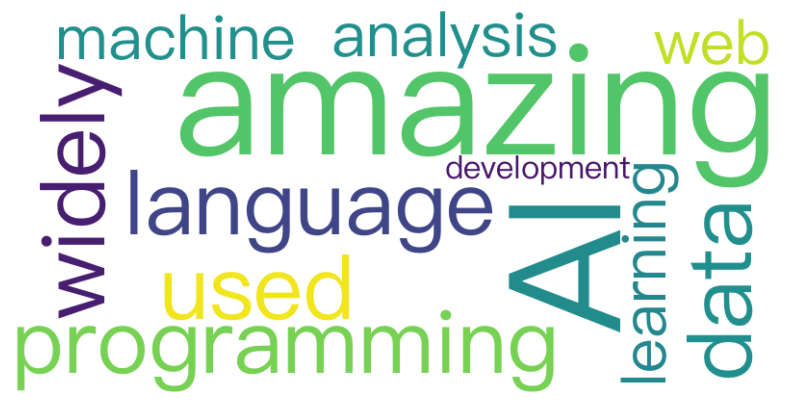

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÔºå'SimHei'ÊòØÂÆã‰ΩìÂ≠ó‰ΩìÁöÑ‰∏ÄÁßçÔºåÊ†πÊçÆÈúÄË¶ÅÈÄâÊã©ÂêàÈÄÇÁöÑÂ≠ó‰Ωì
plt.rcParams['font.sans-serif'] = 'Arial Unicode MS'

# Áî®‰∫éÊ≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑
plt.rcParams['axes.unicode_minus'] = False

# ÂáÜÂ§áÊñáÊú¨Êï∞ÊçÆ
text = "AI  an amazing programming language. It is widely used for data analysis, machine learning, web development, and more."
text = "AI ÁºñÁ®ã ÁºñÁ®ã ÁºñÁ®ã ÁºñÁ®ã ÁºñÁ®ã ÁºñÁ®ã ÁºñÁ®ã ÁºñÁ®ã ÊèêÁ§∫ËØç"
# ÂàõÂª∫ËØç‰∫ëÂØπË±°Âπ∂ÁîüÊàêËØç‰∫ëÂõæÂÉè
font_path = "/System/Library/fonts/PingFang.ttc"
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)

# ÊòæÁ§∫ËØç‰∫ëÂõæÂÉè
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ÈöêËóèÂùêÊ†áËΩ¥
plt.show()

0       1718
1       1932
2       2151
3       1800
4       2812
       ...  
319     9794
320    12868
321    10526
322    13577
323     7004
Name: readers_count, Length: 324, dtype: int64
50 ÂàÜ‰ΩçÊï∞Ôºö6975.5
75 ÂàÜ‰ΩçÊï∞Ôºö10899.5
90 ÂàÜ‰ΩçÊï∞Ôºö12888.3
95 ÂàÜ‰ΩçÊï∞Ôºö14021.499999999998
100 ÂàÜ‰ΩçÊï∞Ôºö20783.0


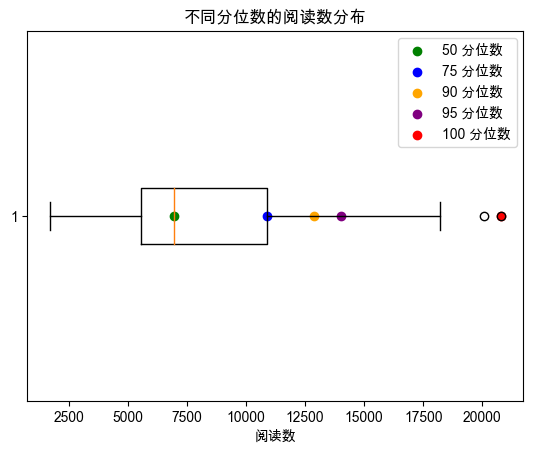

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# ÁîüÊàêÈöèÊú∫ÈòÖËØªÊï∞Êï∞ÊçÆ
np.random.seed(0)  # ‰∏∫‰∫ÜÈáçÁé∞ÊÄßÔºåËÆæÁΩÆÈöèÊú∫Êï∞ÁßçÂ≠ê
readership_data = df["readers_count"]

print(readership_data)

# ÂàõÂª∫ÁÆ±Á∫øÂõæ
# ËÆ°ÁÆó‰∏çÂêåÂàÜ‰ΩçÊï∞
percentiles = [50, 75, 90, 95, 100]
percentile_values = np.percentile(readership_data, percentiles)

# ÊâìÂç∞ÂàÜ‰ΩçÊï∞ÁöÑÂÄº
for p, value in zip(percentiles, percentile_values):
    print(f"{p} ÂàÜ‰ΩçÊï∞Ôºö{value}")

# ÁªòÂà∂ÁÆ±Á∫øÂõæ
plt.boxplot(readership_data, vert=False)

# Ê∑ªÂä†‰∏çÂêåÈ¢úËâ≤ÁöÑÂàÜ‰ΩçÊï∞Ê†áËØÜ
colors = ['green', 'blue', 'orange', 'purple', 'red']
for p, value, color in zip(percentiles, percentile_values, colors):
    plt.scatter(value, 1, color=color, marker='o', label=f"{p} ÂàÜ‰ΩçÊï∞")

# ËÆæÁΩÆÊ†áÁ≠æÂíåÊ†áÈ¢ò
plt.xlabel("ÈòÖËØªÊï∞")
plt.title("‰∏çÂêåÂàÜ‰ΩçÊï∞ÁöÑÈòÖËØªÊï∞ÂàÜÂ∏É")

# Ê∑ªÂä†Âõæ‰æã
plt.legend()

# ÊòæÁ§∫ÂõæË°®
plt.show()